In [1]:
import pandas as pd
import missingno as msno 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
data = pd.read_csv("Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [7]:
data.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                       4254
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [10]:
data['Average Medicare Payment Amount'] = data['Average Medicare Payment Amount'].transform(lambda x: x.replace(',','')).astype('float')
data['Number of Services'] = data['Number of Services'].transform(lambda x: x.replace(',','')).astype('float')
data['Number of Medicare Beneficiaries'] = data['Number of Medicare Beneficiaries'].transform(lambda x: x.replace(',','')).astype('float')
data['Number of Distinct Medicare Beneficiary/Per Day Services'] = data['Number of Distinct Medicare Beneficiary/Per Day Services'].transform(lambda x: x.replace(',','')).astype('float')
data['Average Medicare Allowed Amount'] = data['Average Medicare Allowed Amount'].transform(lambda x: x.replace(',','')).astype('float')
data['Average Submitted Charge Amount'] = data['Average Submitted Charge Amount'].transform(lambda x: x.replace(',','')).astype('float')
data['Average Medicare Standardized Amount'] = data['Average Medicare Standardized Amount'].transform(lambda x: x.replace(',','')).astype('float')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

<Axes: >

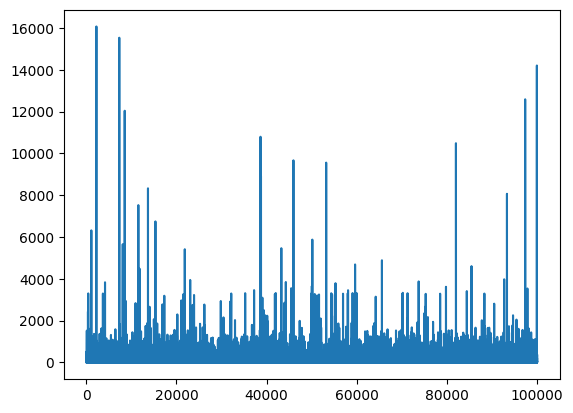

In [12]:
data['Average Medicare Payment Amount'].plot()

In [14]:
data.isnull().sum() / len(data) * 100 #percent

index                                                        0.000
National Provider Identifier                                 0.000
Last Name/Organization Name of the Provider                  0.000
First Name of the Provider                                   4.255
Middle Initial of the Provider                              29.331
Credentials of the Provider                                  7.209
Gender of the Provider                                       4.254
Entity Type of the Provider                                  0.000
Street Address 1 of the Provider                             0.000
Street Address 2 of the Provider                            59.363
City of the Provider                                         0.000
Zip Code of the Provider                                     0.000
State Code of the Provider                                   0.000
Country Code of the Provider                                 0.000
Provider Type                                                0

<Axes: >

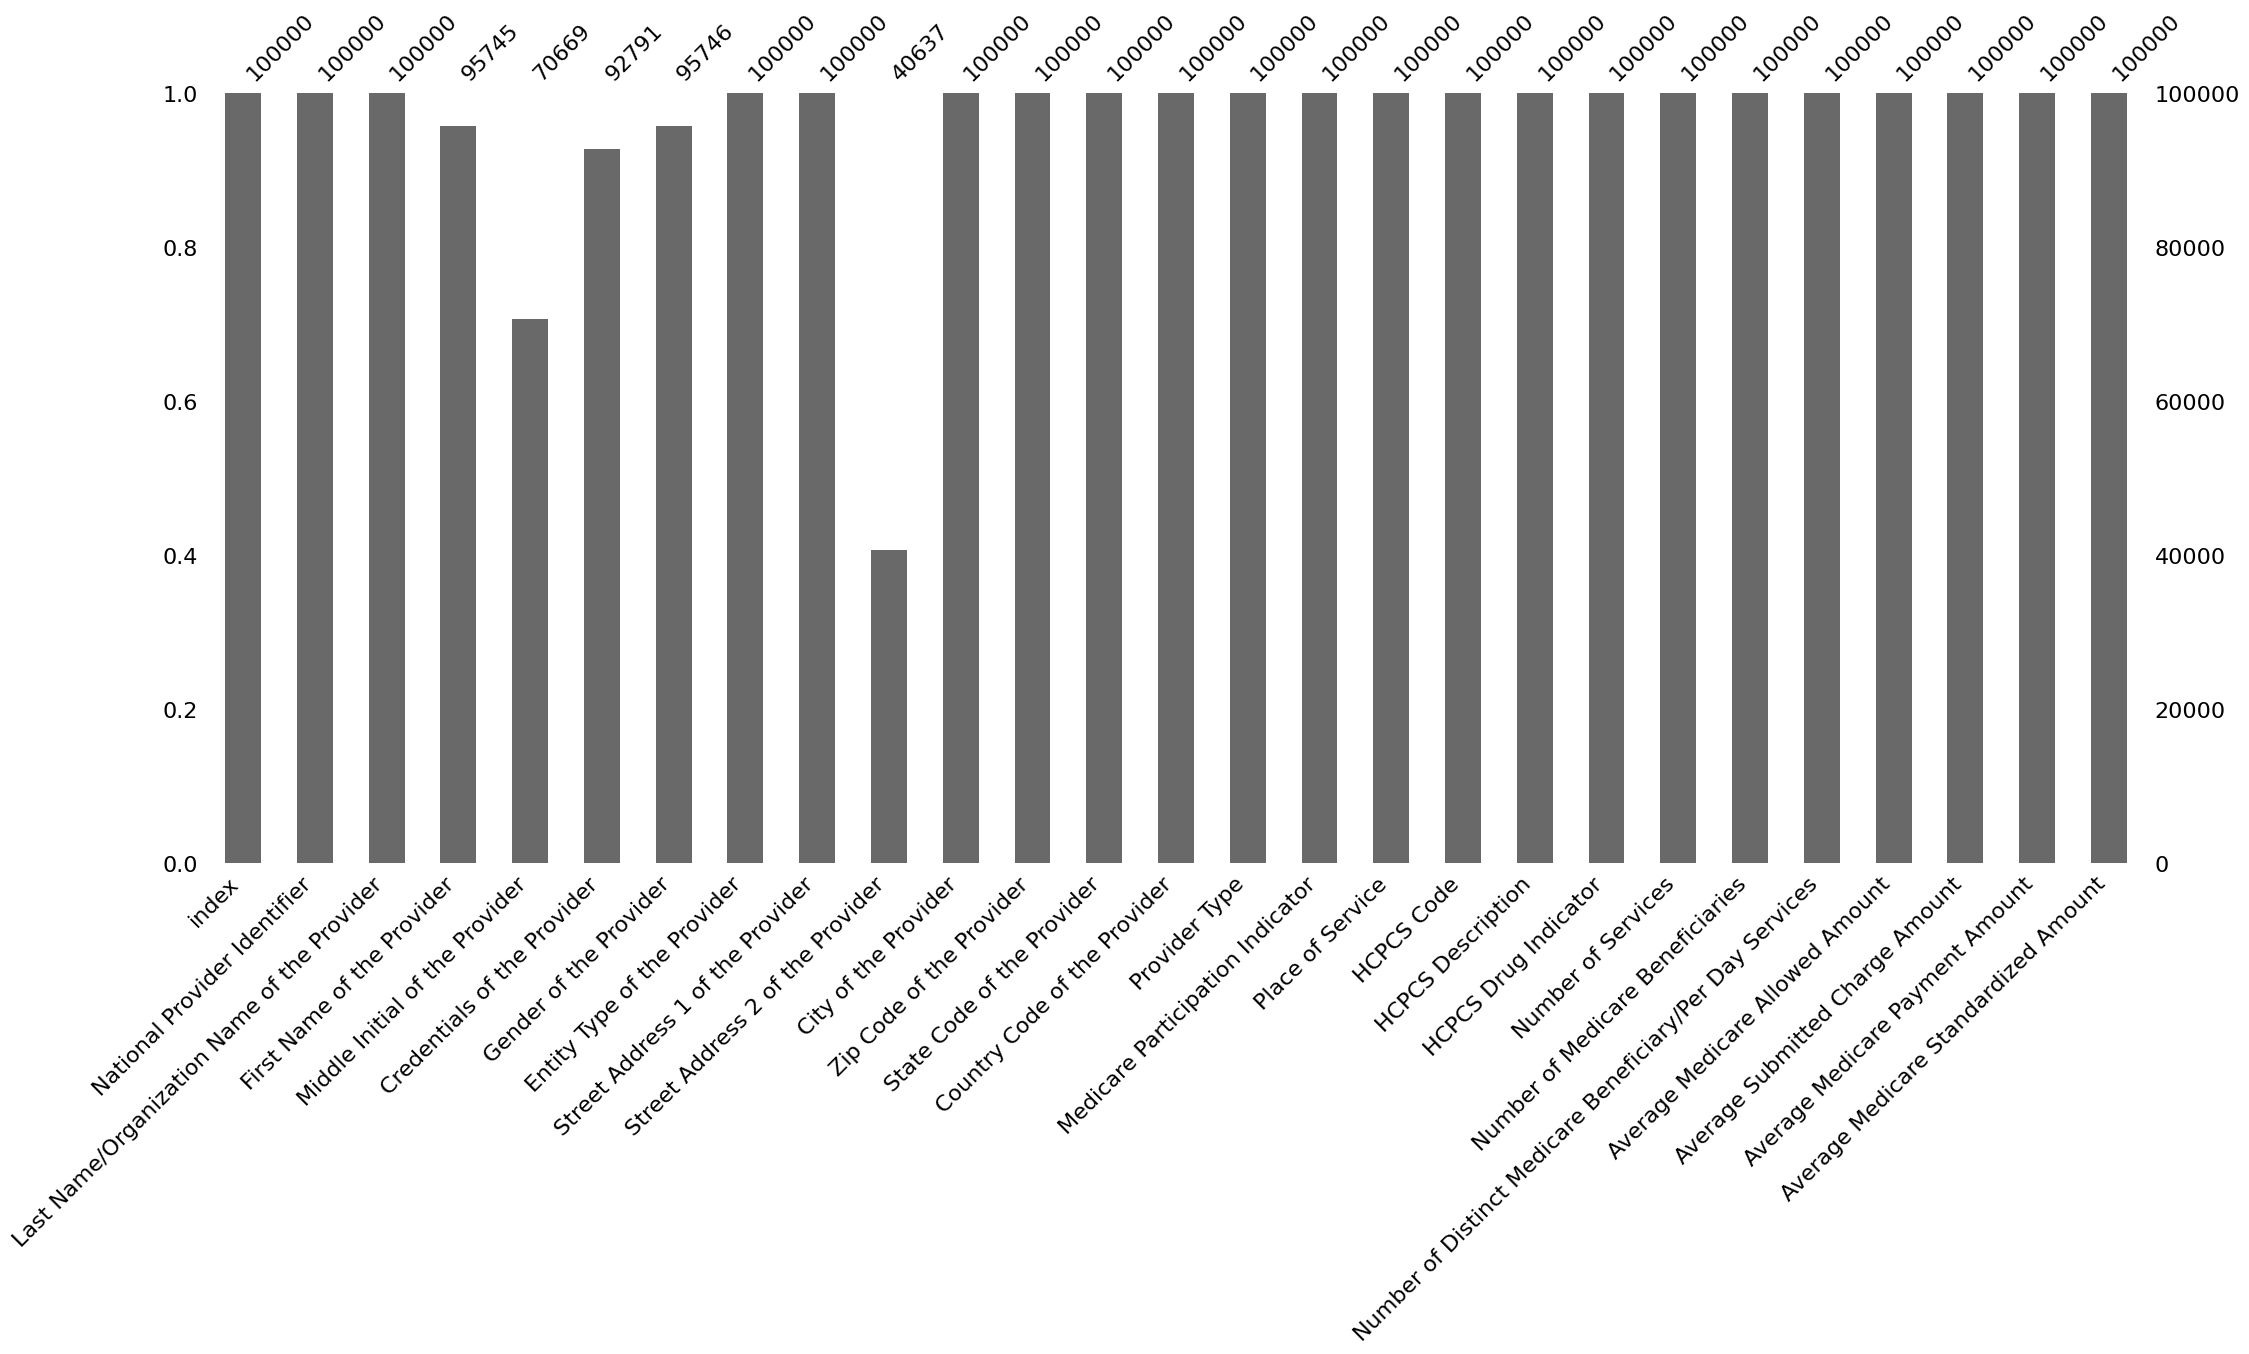

In [15]:
msno.bar(data)

<Axes: >

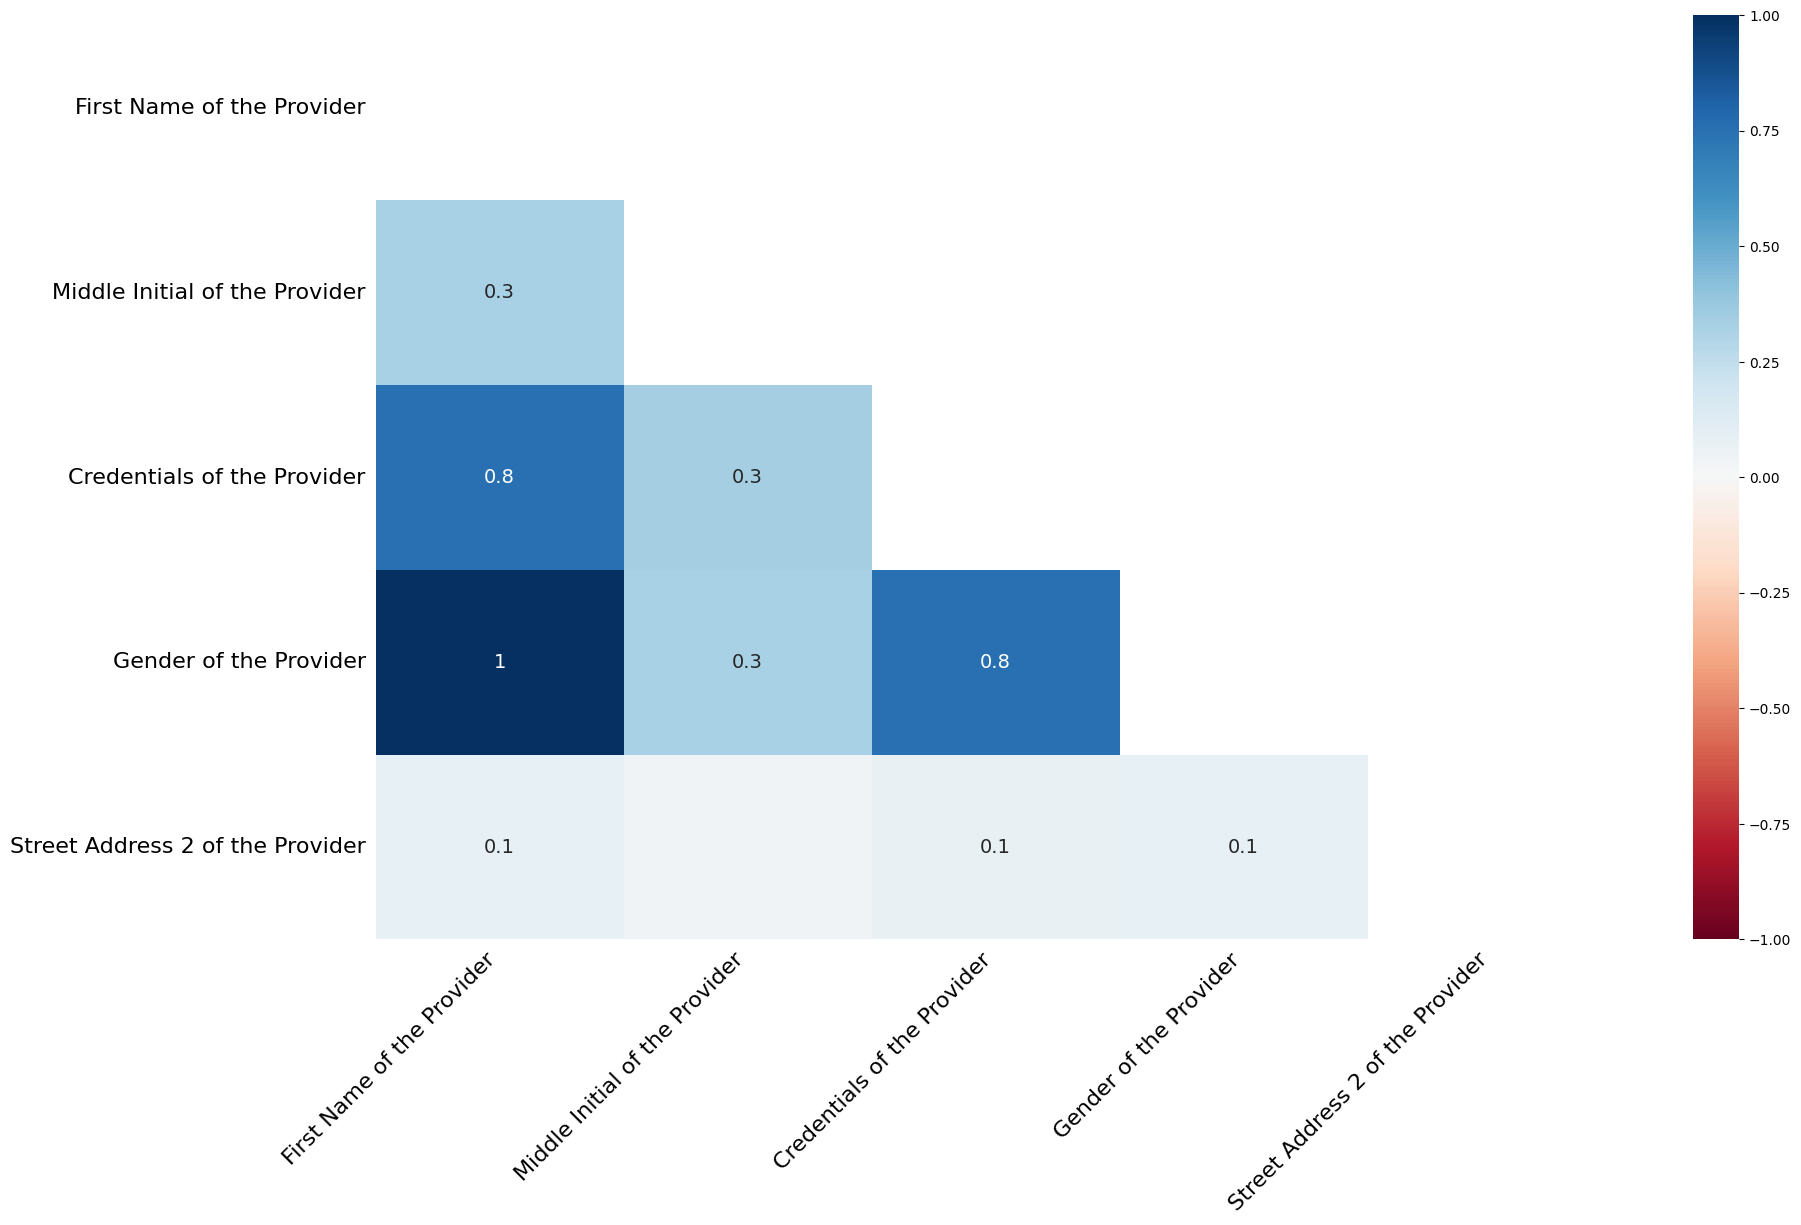

In [16]:
msno.heatmap(data)

In [17]:
data_train = data[['Number of Services', 'Average Medicare Allowed Amount','Gender of the Provider']]
data_train = data.dropna()

In [18]:
data_train

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576
7,6169160,1629160551,GALBREATH,RONALD,G,M.D.,M,I,12522 E. LAMBERT ROAD,SUITE D,...,G0008,Administration of influenza virus vaccine,N,52.0,50.0,52.0,29.330000,50.000000,28.740000,25.320000
16,3642669,1366846719,ORREGO,MARIA,X,PA-C,F,I,1801 INWOOD RD FL 7,SUITE 120,...,99213,Established patient office or other outpatient...,N,364.0,300.0,364.0,63.160000,193.560440,40.645330,41.176071
17,7008969,1710088190,CAMPBELL,AARON,W,M.D,M,I,605 MEDICAL COURTS,SUITE 203,...,99212,Established patient office or other outpatient...,N,21.0,14.0,21.0,42.060000,87.666667,26.698095,28.406190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,816002,1083651145,BEACH,KRISTI,A,CRNA,F,I,501 REDMOND RD NW,ANESTHESIOLOGY DEPARTMENT,...,00810,Anesthesia for procedure on lower intestine us...,N,18.0,18.0,18.0,76.943333,493.500000,63.370556,64.405000
99980,1509836,1154383610,SOBELL,JEFFREY,M,MD,M,I,1244 BOYLSTON ST,SUITE 302,...,99213,Established patient office or other outpatient...,N,846.0,600.0,846.0,80.660000,150.000000,52.188936,48.031241
99988,9030407,1912947946,SCHWARTZ,ROBERT,A,MD,M,I,6420 DUTCHMANS PKWY,SUITE 200,...,33208,Insertion of new or replacement of permanent p...,N,35.0,35.0,35.0,483.991429,1554.000000,378.361714,412.724000
99991,7603631,1770542110,COBB,STEVEN,R,M.D.,M,I,8599 HAVEN AVE.,SUITE 300,...,72100,"X-ray of lower and sacral spine, 2 or 3 views",N,26.0,26.0,26.0,11.550000,70.615385,8.355769,8.653846


In [22]:
model = LogisticRegression()
model.fit(data_train[['Number of Services', 'Average Medicare Allowed Amount']],
          data_train['Gender of the Provider'])

LogisticRegression()

In [23]:
data_test = data[['Number of Services', 'Average Medicare Allowed Amount']]
data['Gender of the Provider'] = model.predict(data_test)

In [24]:
data.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   4255
Middle Initial of the Provider                              29331
Credentials of the Provider                                  7209
Gender of the Provider                                          0
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            59363
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      0
Country Code of the Provider                                    0
Provider Type                                                   0
Medicare P

In [26]:
data_copy = data.copy()
for column in data_copy:
    if data_copy[column].dtype == 'object':
        encoder = LabelEncoder()
        data_copy[column] = encoder.fit_transform(data_copy[column])

In [27]:
data_copy.info()
data_copy.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  int64  
 3   First Name of the Provider                                100000 non-null  int64  
 4   Middle Initial of the Provider                            100000 non-null  int64  
 5   Credentials of the Provider                               100000 non-null  int64  
 6   Gender of the Provider                                    100000 non-null  int64  
 7   Entity Type of the Provider                               100000 non-null  int64  
 8   Stree

index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
Street Address 2 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of

In [28]:
statistics = []
for column in data:
    if data[column].dtype != 'object':
        statistics.append(data[column].describe())
pd.DataFrame(statistics)

,count,mean,std,min,25%,50%,75%,max
index,100000.0,4.907646e+06,2.839633e+06,2.090000e+02,2.458791e+06,4.901266e+06,7.349450e+06,9.847440e+06
National Provider Identifier,100000.0,1.498227e+09,2.874125e+08,1.003001e+09,1.245669e+09,1.497847e+09,1.740374e+09,1.993000e+09
Zip Code of the Provider,100000.0,4.163820e+08,3.082566e+08,6.010000e+02,1.426300e+08,3.633025e+08,6.819881e+08,9.990166e+08
Number of Services,100000.0,2.396714e+02,2.493187e+03,1.100000e+01,2.100000e+01,4.300000e+01,1.180000e+02,2.827390e+05
Number of Medicare Beneficiaries,100000.0,8.980931e+01,1.109617e+03,1.100000e+01,1.700000e+01,3.200000e+01,7.500000e+01,1.903060e+05
Number of Distinct Medicare Beneficiary/Per Day Services,100000.0,1.421157e+02,1.640227e+03,1.100000e+01,2.000000e+01,4.000000e+01,1.060000e+02,2.827370e+05
Average Medicare Allowed Amount,100000.0,1.014342e+02,2.572428e+02,1.000000e-02,2.427000e+01,6.509500e+01,1.131600e+02,2.049400e+04
Average Submitted Charge Amount,100000.0,3.545505e+02,1.062608e+03,1.000000e-02,5.764788e+01,1.460000e+02,2.989321e+02,6.269400e+04
Average Medicare Payment Amount,100000.0,7.735880e+01,1.997188e+02,8.679245e-03,1.933523e+01,4.702018e+01,8.489445e+01,1.606730e+04
Average Medicare Standardized Amount,100000.0,7.803069e+01,2.000455e+02,8.679245e-03,2.012185e+01,4.784109e+01,8.487956e+01,1.695715e+04


In [35]:
statistics = []
for column in data:
    if data[column].dtype == 'object':
        statistics.append(data[column].describe())
pd.DataFrame(statistics)

,count,unique,top,freq
Last Name/Organization Name of the Provider,100000,42820,PATEL,557
First Name of the Provider,95745,13022,MICHAEL,2350
Middle Initial of the Provider,70669,29,A,8152
Credentials of the Provider,92791,1854,MD,32874
Gender of the Provider,100000,1,M,100000
Entity Type of the Provider,100000,2,I,95746
Street Address 1 of the Provider,100000,51928,200 1ST ST SW,244
Street Address 2 of the Provider,40637,10024,SUITE 200,1624
City of the Provider,100000,5846,NEW YORK,1061
State Code of the Provider,100000,58,CA,7775


<Axes: >

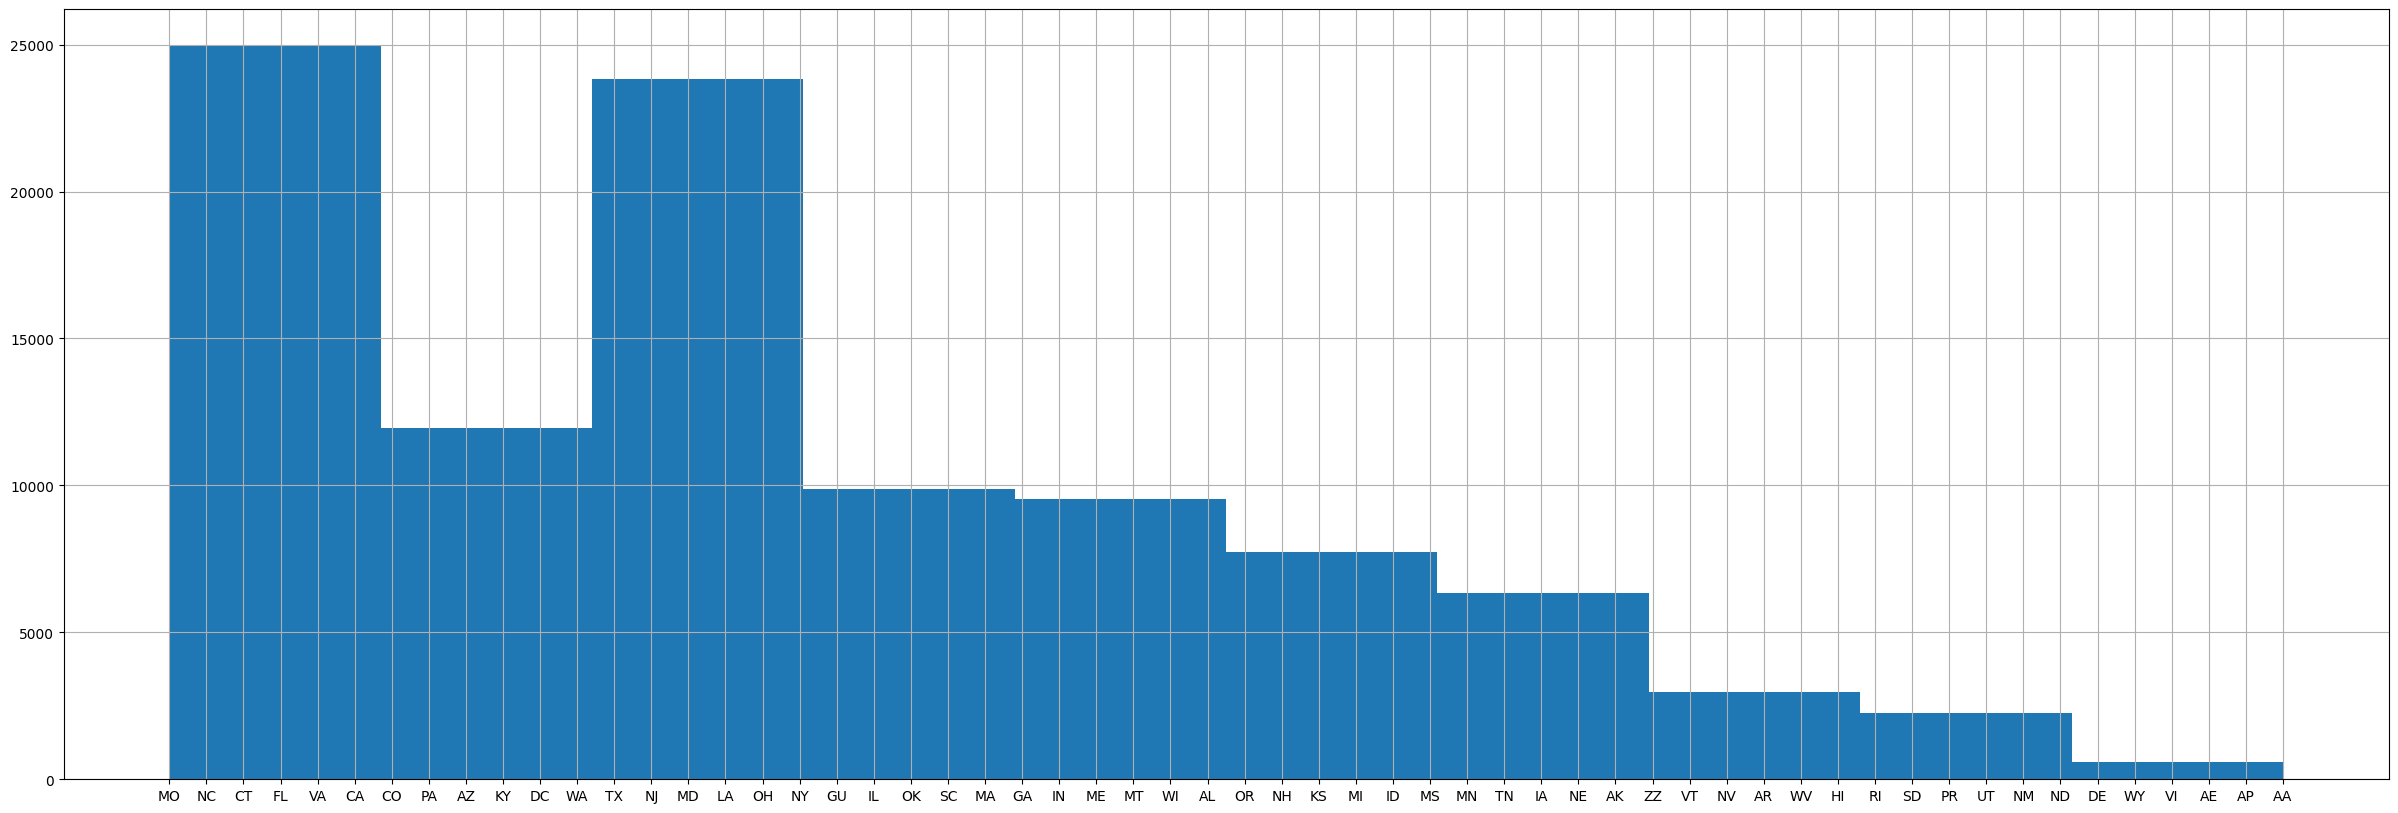

In [42]:
# State Code of the Provider, Average Submitted Charge Amount
data['State Code of the Provider'].hist(figsize=(30,10))

<Axes: >

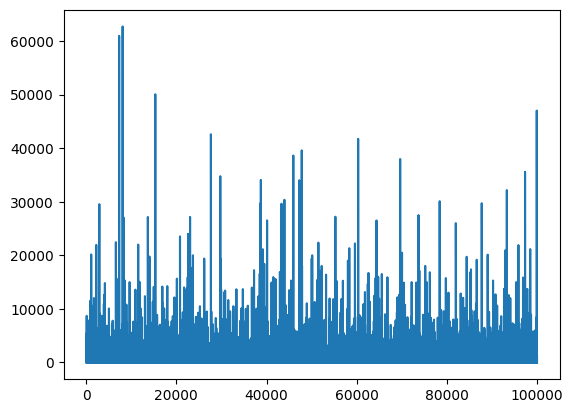

In [43]:
data['Average Submitted Charge Amount'].plot()

<Axes: xlabel='Average Submitted Charge Amount', ylabel='Average Medicare Standardized Amount'>

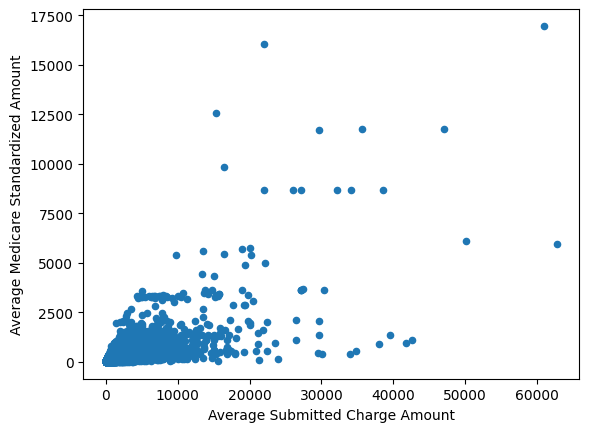

In [44]:
data.plot.scatter(x='Average Submitted Charge Amount', y='Average Medicare Standardized Amount')